In [25]:
! pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.9.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp311-cp311-win_amd64.whl.metadata (6.1 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.9.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.8.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached pystan-3.7.0-py3-none-any.whl.metadata 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

  copying pystan\stan\lib\stan_math\lib\eigen_3.3.3\unsupported\Eigen\src\Polynomials\PolynomialSolver.h -> build\lib.win-amd64-cpython-311\pystan\stan\lib\stan_math\lib\eigen_3.3.3\unsupported\Eigen\src\Polynomials
  copying pystan\stan\lib\stan_math\lib\eigen_3.3.3\unsupported\Eigen\src\Polynomials\PolynomialUtils.h -> build\lib.win-amd64-cpython-311\pystan\stan\lib\stan_math\lib\eigen_3.3.3\unsupported\Eigen\src\Polynomials
  creating build\lib.win-amd64-cpython-311\pystan\stan\lib\stan_math\lib\eigen_3.3.3\unsupported\Eigen\src\Skyline
  copying pystan\stan\lib\stan_math\lib\eigen_3.3.3\unsupported\Eigen\src\Skyline\SkylineInplaceLU.h -> build\lib.win-amd64-cpython-3

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import prophet

In [10]:
data = pd.read_csv('Traffic data.csv')
data

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [11]:
data.isnull().sum()

ID          0
Datetime    0
Count       0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [13]:
data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


### EDA

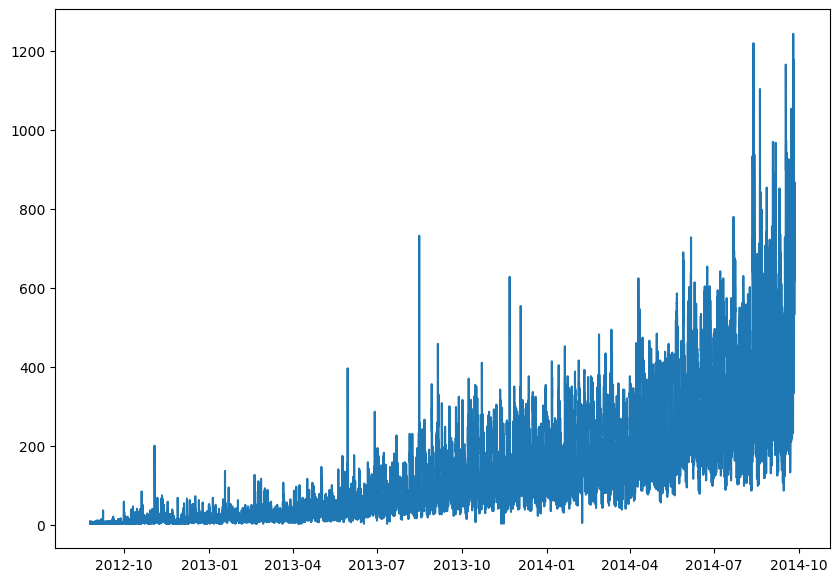

In [16]:
plt.figure(figsize=(10,7))
plt.plot(data['Datetime'],data['Count'])
plt.show()

### Format data for the model

In [17]:
data.index = data['Datetime']
data['y'] = data['Count']
data.drop(columns=['ID','Datetime','Count'],axis=1,inplace = True)
data = data.resample('D').sum()

In [18]:
data

,y
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60
...,...
2014-09-21,9102
2014-09-22,14116
2014-09-23,13304


In [19]:
data['ds'] = data.index
data

,y,ds
Datetime,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29
...,...,...
2014-09-21,9102,2014-09-21
2014-09-22,14116,2014-09-22
2014-09-23,13304,2014-09-23


### input split

In [20]:
size=60
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=size/len(data),shuffle=False)

### Model Training

In [24]:
model = prophet(yearly_seasonality=True,seasonality_prior_scale=0.9)
model.fit(train)

TypeError: 'module' object is not callable